In [184]:
from math import sqrt
import numpy as np
import sympy as sm

import matplotlib.pyplot as plt
import pandas as pd
#from scipy.optimize import curve_fit
from lab_processing import print_errors, create_plot

In [185]:
x, y = sm.symbols('x y')

In [238]:
#y' = f
#f = (y**2 - 3*x*y - 2*x**2)/(x**2 - x*y)
f = 3*x * y + x*y**2
#x ∈ (x_0; x_N)
x_0 = 0
x_N = 1
#accuracy
epsln = 10**(-4)
#y(x_0) = ...
y_0 = -4
#initial number of grid nodes
N_nodes = 100
#initial grid step
h = (x_N - x_0)/N_nodes

In [239]:
#x_grid, h = np.linspace(x_0, x_N, N_nodes, retstep = True)
x_grid = np.arange(x_0, x_N + 0.001, h)
y_grid = np.empty(x_grid.size)
y_grid[0] = y_0

In [240]:
print(x_grid, h)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] 0.01


In [241]:
for i in range(1, x_grid.size):
    y_grid[i] = y_grid[i-1] + \
                h*f.subs([(x, x_grid[i-1] + h/2), \
                        (y, y_grid[i-1] + h/2*f.subs([(x, x_grid[i-1]), \
                                                      (y, y_grid[i-1])]) \
                        )])

In [242]:
print(y_grid)

[-4.         -3.9998     -3.9992003  -3.9982018  -3.99680599 -3.99501496
 -3.99283139 -3.9902585  -3.98730013 -3.98396062 -3.98024489 -3.97615835
 -3.97170694 -3.96689707 -3.96173563 -3.95622996 -3.9503878  -3.94421731
 -3.93772702 -3.93092583 -3.92382293 -3.91642785 -3.90875036 -3.9008005
 -3.89258853 -3.88412489 -3.87542021 -3.86648523 -3.85733085 -3.84796803
 -3.83840779 -3.82866121 -3.81873939 -3.80865341 -3.79841433 -3.78803316
 -3.77752084 -3.76688821 -3.75614603 -3.74530492 -3.73437534 -3.72336764
 -3.71229194 -3.70115823 -3.68997627 -3.67875562 -3.66750562 -3.6562354
 -3.64495383 -3.63366955 -3.62239096 -3.61112617 -3.59988308 -3.58866929
 -3.57749215 -3.56635874 -3.55527587 -3.54425007 -3.53328763 -3.52239454
 -3.51157653 -3.50083906 -3.49018735 -3.47962633 -3.46916068 -3.45879483
 -3.44853295 -3.43837897 -3.42833657 -3.4184092  -3.40860007 -3.39891217
 -3.38934825 -3.37991087 -3.37060235 -3.36142482 -3.35238021 -3.34347024
 -3.33469645 -3.32606021 -3.3175627  -3.30920493 -3.3

In [243]:
#x_grid_2h, h_2 = np.linspace(x_0, x_N, 2*N_nodes + 1, retstep = True)
h_2 = 2*h
x_grid_2h = np.arange(x_0, x_N + 0.001, h_2)
y_grid_2h = np.empty(x_grid_2h.size)
y_grid_2h[0] = y_0
for i in range(1, x_grid_2h.size):
    y_grid_2h[i] = y_grid_2h[i-1] + \
                h_2*f.subs([(x, x_grid_2h[i-1] + h_2/2), \
                        (y, y_grid_2h[i-1] + h_2/2*f.subs([(x, x_grid_2h[i-1]), \
                                                      (y, y_grid_2h[i-1])]) \
                        )])

In [244]:
print(y_grid_2h)

[-4.         -3.9992     -3.9968048  -3.99282872 -3.98729544 -3.98023767
 -3.97169674 -3.96172207 -3.95037054 -3.93770584 -3.92379765 -3.90872089
 -3.89255486 -3.87538242 -3.8572891  -3.83836228 -3.8186904  -3.79836219
 -3.77746592 -3.75608877 -3.73431617 -3.71223132 -3.68991468 -3.66744355
 -3.64489174 -3.62232933 -3.59982236 -3.57743276 -3.55521822 -3.53323209
 -3.51152344 -3.49013702 -3.46911338 -3.44848891 -3.42829599 -3.40856311
 -3.38931505 -3.37057299 -3.35235474 -3.33467492 -3.3175451  -3.30097403
 -3.28496781 -3.26953011 -3.25466228 -3.2403636  -3.22663142 -3.21346133
 -3.20084733 -3.18878197 -3.17725652]


In [245]:
dataset = pd.DataFrame({'x':x_grid,'y':y_grid})
dataset_2 = pd.DataFrame({'x_2':x_grid_2h,'y_2':y_grid_2h})
bb = dataset_2.T
gg = dataset.T
bb

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
x_2,0.0,0.0200,0.040000,0.060000,0.080000,0.100000,0.120000,0.140000,0.160000,0.180000,...,0.820000,0.840000,0.86000,0.880000,0.900000,0.920000,0.940000,0.960000,0.980000,1.000000
y_2,-4.0,-3.9992,-3.996805,-3.992829,-3.987295,-3.980238,-3.971697,-3.961722,-3.950371,-3.937706,...,-3.300974,-3.284968,-3.26953,-3.254662,-3.240364,-3.226631,-3.213461,-3.200847,-3.188782,-3.177257


In [246]:
gg

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
x,0.0,0.0100,0.0200,0.030000,0.040000,0.050000,0.060000,0.070000,0.0800,0.090000,...,0.910000,0.920000,0.93000,0.940000,0.950000,0.960000,0.970000,0.980000,0.990000,1.00000
y,-4.0,-3.9998,-3.9992,-3.998202,-3.996806,-3.995015,-3.992831,-3.990259,-3.9873,-3.983961,...,-3.233424,-3.226627,-3.21997,-3.213453,-3.207076,-3.200836,-3.194734,-3.188768,-3.182937,-3.17724


In [247]:
diff_y_h_y_2h = np.empty(y_grid_2h.size)

In [248]:
for i in range(0, y_grid_2h.size):
    diff_y_h_y_2h[i] = y_grid_2h[i] - y_grid[2*i]

In [249]:
print('Accuracy: ', diff_y_h_y_2h.max() / (2**2 - 1), '< 10**(-4)')

Accuracy:  2.069521179315359e-05 < 10**(-4)


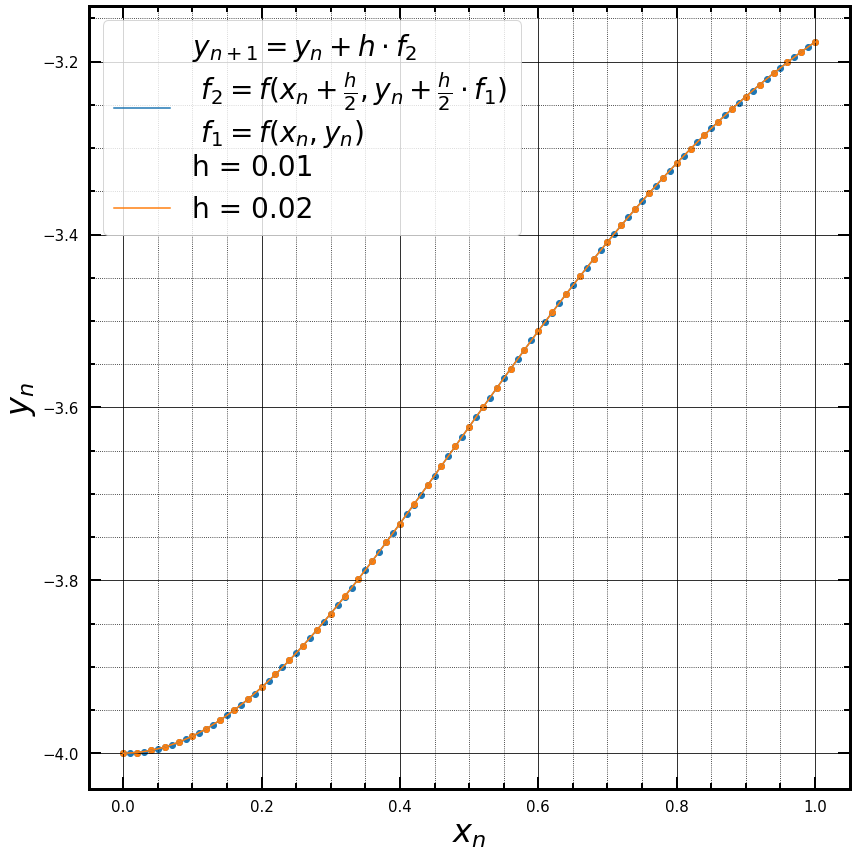

In [250]:
fig, ax = create_plot(10,10)
ax.plot(x_grid, y_grid, label='$ y_{n+1} = y_n + h \cdot f_2$ \n \
$ f_2 = f(x_n + \\frac{h}{2}, y_n + \\frac{h}{2} \cdot f_1)$ \n \
$ f_1 = f(x_n, y_n)$ \n' + f'h = {h}')
ax.scatter(x_grid, y_grid)
ax.plot(x_grid_2h, y_grid_2h, label=f'h = {h_2}')
ax.scatter(x_grid_2h, y_grid_2h)


ax.set_xlabel('$x_n$', fontsize=32)
ax.set_ylabel('$y_n$', fontsize=32)
ax.legend(fontsize=28)
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
#fig.savefig(f'graphs/plot_{1}.pdf')